Epoch 100, Loss: 0.3898, Accuracy: 0.8933
Epoch 200, Loss: 0.2416, Accuracy: 0.9333
Epoch 300, Loss: 0.1986, Accuracy: 0.9400
Epoch 400, Loss: 0.1776, Accuracy: 0.9400
Epoch 500, Loss: 0.1653, Accuracy: 0.9400
Epoch 600, Loss: 0.1572, Accuracy: 0.9333
Epoch 700, Loss: 0.1517, Accuracy: 0.9333
Epoch 800, Loss: 0.1477, Accuracy: 0.9333
Epoch 900, Loss: 0.1448, Accuracy: 0.9333
Epoch 1000, Loss: 0.1425, Accuracy: 0.9333


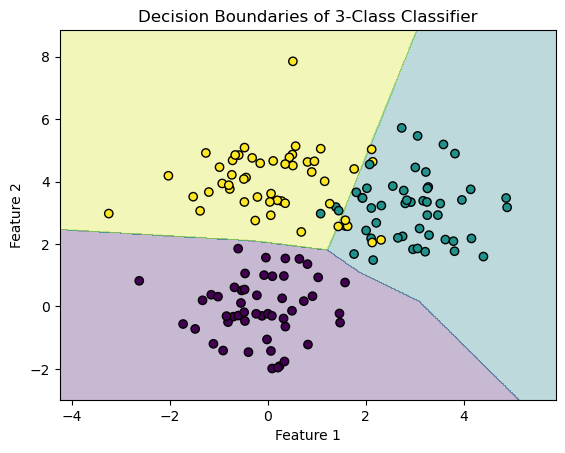

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
N=50
X0=np.random.randn(N,2)+np.array([0,0])
y0=np.zeros(N,dtype=int)
X1=np.random.randn(N,2)+np.array([3,3])
y1=np.ones(N,dtype=int)
X2=np.random.randn(N,2)+np.array([0,4])
y2=np.full(N,2,dtype=int)
X=np.vstack([X0,X1,X2])
y=np.hstack([y0,y1,y2])
indices=np.random.permutation(X.shape[0])
X=X[indices]
y=y[indices]
def one_hot(y,num_classes=3):
    oh=np.zeros((y.size,num_classes))
    oh[np.arange(y.size),y]=1
    return oh
y_oh=one_hot(y)
def relu(z): return np.maximum(0,z)
def relu_derivative(z): return (z>0).astype(float)
def softmax(z):
    exp_z=np.exp(z-np.max(z,axis=1,keepdims=True))
    return exp_z/np.sum(exp_z,axis=1,keepdims=True)
input_size=2
hidden_size=10
output_size=3
lr=0.1
W1=np.random.randn(input_size,hidden_size)*0.01
b1=np.zeros((1,hidden_size))
W2=np.random.randn(hidden_size,output_size)*0.01
b2=np.zeros((1,output_size))
epochs=1000
for epoch in range(epochs):
    Z1=np.dot(X,W1)+b1
    A1=relu(Z1)
    Z2=np.dot(A1,W2)+b2
    A2=softmax(Z2)
    loss=-np.mean(np.sum(y_oh*np.log(A2+1e-8),axis=1))
    dZ2=A2-y_oh
    dW2=np.dot(A1.T,dZ2)/X.shape[0]
    db2=np.sum(dZ2,axis=0,keepdims=True)/X.shape[0]
    dA1=np.dot(dZ2,W2.T)
    dZ1=dA1*relu_derivative(Z1)
    dW1=np.dot(X.T,dZ1)/X.shape[0]
    db1=np.sum(dZ1,axis=0,keepdims=True)/X.shape[0]
    W1-=lr*dW1
    b1-=lr*db1
    W2-=lr*dW2
    b2-=lr*db2
    if (epoch+1)%100==0:
        preds=np.argmax(A2,axis=1)
        acc=np.mean(preds==y)
        print(f"Epoch {epoch+1}, Loss: {loss:.4f}, Accuracy: {acc:.4f}")
h=0.02
x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
grid=np.c_[xx.ravel(),yy.ravel()]
Z1_grid=np.dot(grid,W1)+b1
A1_grid=relu(Z1_grid)
Z2_grid=np.dot(A1_grid,W2)+b2
A2_grid=softmax(Z2_grid)
pred_grid=np.argmax(A2_grid,axis=1).reshape(xx.shape)
plt.contourf(xx,yy,pred_grid,alpha=0.3,cmap='viridis')
plt.scatter(X[:,0],X[:,1],c=y,edgecolors='k',cmap='viridis')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundaries of 3-Class Classifier")
plt.show()
